In [81]:
import warnings
import sys
import pandas as pd

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

import data

import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,0,'Ano')

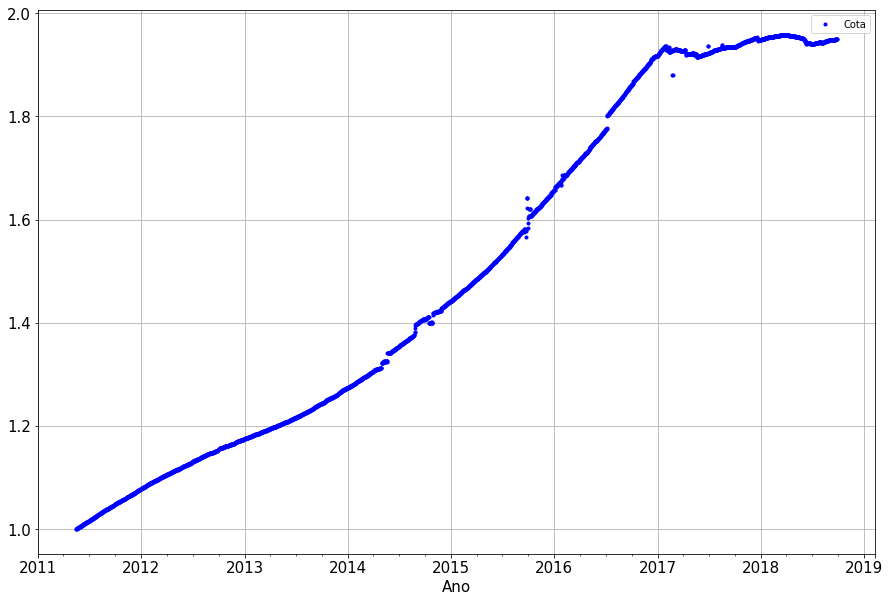

In [82]:
timeseries02_daily = data.load_timeseries02_daily()

timeseries02_daily.plot(figsize=(15, 10), linewidth=2, fontsize=15, style='b.')
plt.grid(True)
plt.xlabel('Ano', fontsize=15)

Text(0.5,0,'Ano')

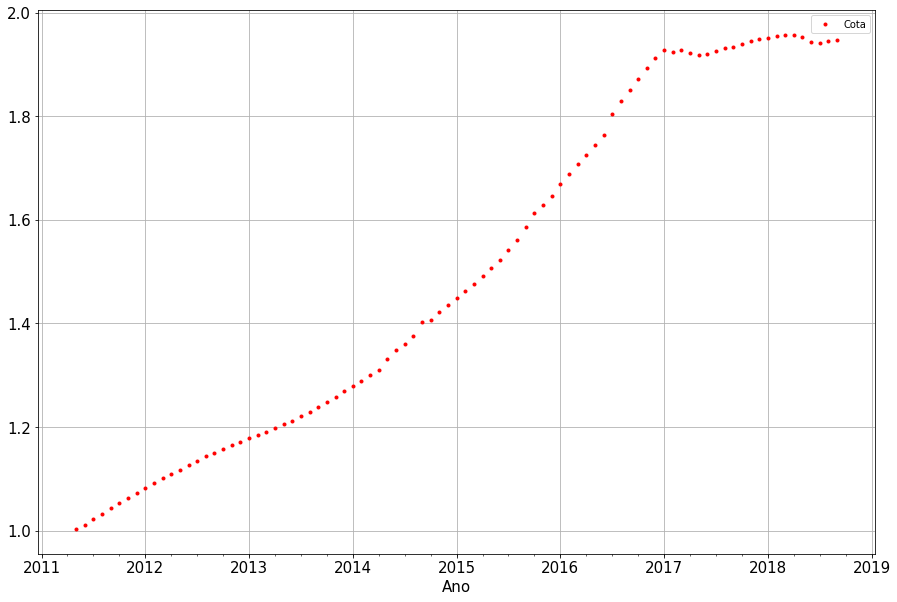

In [83]:
timeseries02_monthly = data.load_timeseries02_monthly()

timeseries02_monthly.plot(figsize=(15, 10), linewidth=2, fontsize=15, style='r.')
plt.grid(True)
plt.xlabel('Ano', fontsize=15)

In [84]:
# evaluate an ARIMA model for a given order (p, d, q)
def evaluate_arima_model(X, arima_order):
  # prepare training dataset
  train_size = int(len(X) * 0.66)
  train, test = X[0:train_size], X[train_size:]
  history = [x for x in train]
  
  # make predictions
  predictions = list()

  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit(disp=0)
    
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))

  error = 0

  # calculate out of sample error
  try:
    error = mean_squared_error(test, predictions)
  except:
    print(predictions)
    raise

  return error


# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
  dataset = dataset.astype('float32')
  best_score, best_cfg = float("inf"), None
  for p in p_values:
    
    for d in d_values:
      for q in q_values:
        order = (p,d,q)
        print(order)
        
        try:
          mse = evaluate_arima_model(dataset, order)
          if mse < best_score:
            best_score, best_cfg = mse, order
          print('ARIMA%s MSE=%.3f' % (order, mse))
          
        except ValueError:
          print("Could not convert data to an integer.")
          #continue
          raise
          
        except:
          print("Unexpected error:", sys.exc_info()[0])
          #continue
          raise

  print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

  
def evaluate_models2(dataset, arima_params):
  dataset = dataset.astype('float32')
  best_score, best_cfg = float("inf"), None
  
  print(len(arima_params))
  for params in arima_params:
    try:
      mse = evaluate_arima_model(dataset, params)
      
      if mse < best_score:
        best_score, best_cfg = mse, params
        
      print('ARIMA%s MSE=%.3f' % (params, mse))
      
    except ValueError:
      print("Could not convert data to an integer.")
      #continue
    except:
      print("Unexpected error:", sys.exc_info()[0])
      #continue
      
  print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

def st_check(timeseries):   
    #rolmean = pd.rolling_mean(timeseries, window=12) ## as month is year divide by 12
    rolmean = timeseries.rolling(12).mean()
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std  = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    print ('Results of Dickey-Fuller Test:')
    timeseries = timeseries.iloc[:,0].values
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print (dfoutput)
    


def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    print(str(timeseries))
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

    

# prepare training dataset
train_size = int(len(timeseries02_monthly) * 0.66)
train, test = timeseries02_monthly[0:train_size], timeseries02_monthly[train_size:]
#print(str(train) + '\n')
#print(str(test) + '\n')

history = [x for x in train]
#print(history)

In [85]:
print(len(timeseries02_monthly))
print(len(timeseries02_monthly.iloc[:,0].values))
adf_test(timeseries02_monthly.iloc[:,0].values)

89
89
Results of Dickey-Fuller Test:
[1.00284899 1.01079356 1.02143794 1.03284673 1.04292059 1.05305248
 1.06246486 1.07291464 1.08316741 1.09259235 1.10136371 1.10970299
 1.11760233 1.12567721 1.13463951 1.14311819 1.14995172 1.15838754
 1.164316   1.17173161 1.17817699 1.18430723 1.19096615 1.19782614
 1.20488722 1.21235558 1.22030523 1.22911526 1.23915112 1.24879424
 1.25778366 1.26916408 1.27870379 1.28959127 1.29990965 1.31026321
 1.33040943 1.34824451 1.3606071  1.37611123 1.40287843 1.40638518
 1.42209169 1.4356782  1.44879528 1.46237663 1.47628801 1.49101201
 1.50641338 1.52329405 1.54123064 1.56150123 1.58542446 1.61324354
 1.62805845 1.64706473 1.66897483 1.68881308 1.70693992 1.72502294
 1.74521514 1.76386009 1.8040944  1.82903172 1.85025279 1.87285252
 1.8923897  1.91211656 1.92829959 1.92489619 1.92847889 1.92274012
 1.91905249 1.92117243 1.926543   1.93230783 1.93422599 1.93874683
 1.94603752 1.94994657 1.95130906 1.9548726  1.95719186 1.95624528
 1.95307031 1.94318711 1.

Text(0.5,0,'Year')

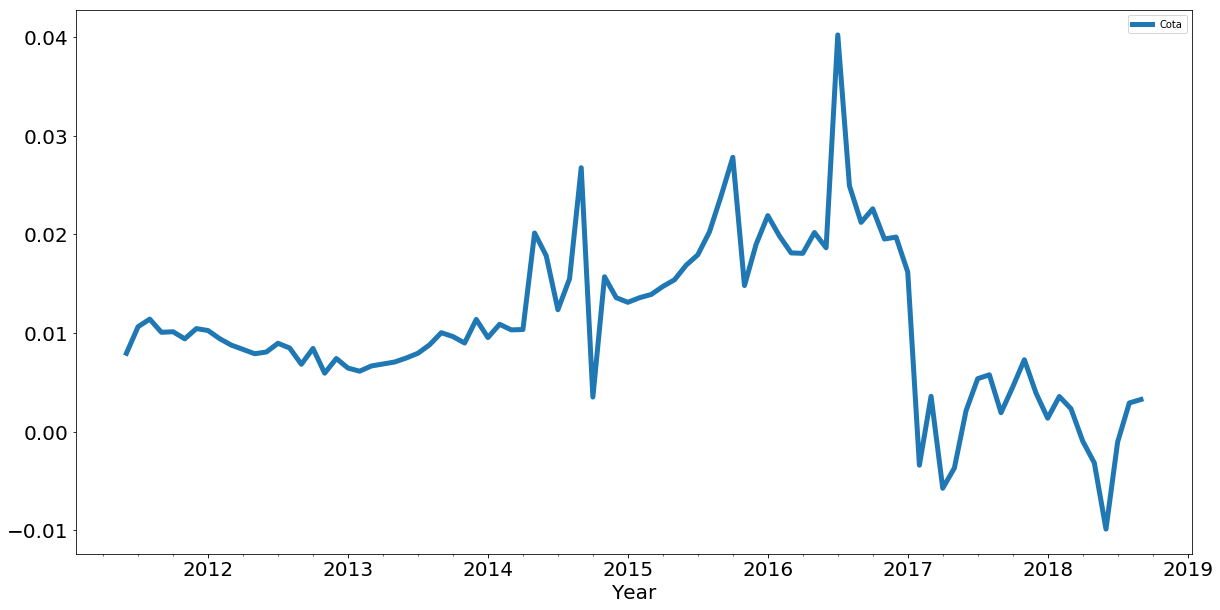

In [86]:
diff1 = timeseries02_monthly.diff()
diff1.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

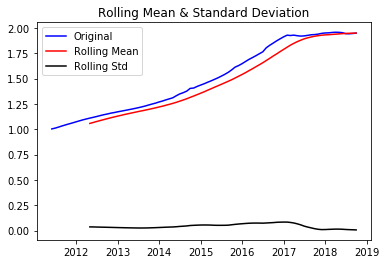

Results of Dickey-Fuller Test:
Test Statistic                 -1.037377
p-value                         0.739389
#Lags Used                      3.000000
Number of Observations Used    85.000000
dtype: float64
None


In [87]:
print(st_check(timeseries02_monthly))

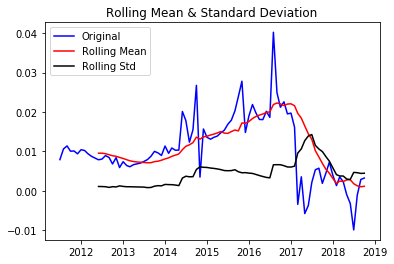

Results of Dickey-Fuller Test:


MissingDataError: exog contains inf or nans

In [88]:
print(st_check(diff1))
adf_test(diff1.iloc[:,0].values)

In [ ]:
# evaluate parameters
p_values = [0, 1, 2, 3] # ,4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30
d_values = range(0, 2) # vai ate o 10 !
q_values = range(0, 2)

print(p_values)
print(d_values)
print(q_values)

arima_params = []

for p in p_values:
  for d in d_values:
    for q in q_values:
      arima_params.append((p, d, q))
      
len(arima_params)

In [ ]:
warnings.filterwarnings("ignore")
evaluate_models(timeseries02_monthly.values, p_values, d_values, q_values)
#evaluate_models2(timeseries02_monthly.values, arima_params)